# Анализ котировок EURUSD 2018

In [40]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from mpl_finance import candlestick2_ohlc
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/aviz/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
min_01 = 'http://export.finam.ru/EURUSD_180101_181130.csv?market=5&em=83&code=EURUSD&apply=0&df=1&mf=0&yf=2018&from=01.01.2018&dt=30&mt=10&yt=2018&to=30.11.2018&p=2&f=EURUSD_180101_181130&e=.csv&cn=EURUSD&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=3&sep2=1&datf=5&at=1'
min_05 = 'http://export.finam.ru/EURUSD_180101_181130.csv?market=5&em=83&code=EURUSD&apply=0&df=1&mf=0&yf=2018&from=01.01.2018&dt=30&mt=10&yt=2018&to=30.11.2018&p=3&f=EURUSD_180101_181130&e=.csv&cn=EURUSD&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=3&sep2=1&datf=5&at=1'
min_10 = 'http://export.finam.ru/EURUSD_180101_181130.csv?market=5&em=83&code=EURUSD&apply=0&df=1&mf=0&yf=2018&from=01.01.2018&dt=30&mt=10&yt=2018&to=30.11.2018&p=4&f=EURUSD_180101_181130&e=.csv&cn=EURUSD&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=3&sep2=1&datf=5&at=1'
min_15 = 'http://export.finam.ru/EURUSD_180101_181130.csv?market=5&em=83&code=EURUSD&apply=0&df=1&mf=0&yf=2018&from=01.01.2018&dt=30&mt=10&yt=2018&to=30.11.2018&p=5&f=EURUSD_180101_181130&e=.csv&cn=EURUSD&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=3&sep2=1&datf=5&at=1'
min_30 = 'http://export.finam.ru/EURUSD_180101_181130.csv?market=5&em=83&code=EURUSD&apply=0&df=1&mf=0&yf=2018&from=01.01.2018&dt=30&mt=10&yt=2018&to=30.11.2018&p=6&f=EURUSD_180101_181130&e=.csv&cn=EURUSD&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=3&sep2=1&datf=5&at=1'
__hour = 'http://export.finam.ru/EURUSD_180101_181130.csv?market=5&em=83&code=EURUSD&apply=0&df=1&mf=0&yf=2018&from=01.01.2018&dt=30&mt=10&yt=2018&to=30.11.2018&p=7&f=EURUSD_180101_181130&e=.csv&cn=EURUSD&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=3&sep2=1&datf=5&at=1'
___day = 'http://export.finam.ru/EURUSD_180101_181130.csv?market=5&em=83&code=EURUSD&apply=0&df=1&mf=0&yf=2018&from=01.01.2018&dt=30&mt=10&yt=2018&to=30.11.2018&p=8&f=EURUSD_180101_181130&e=.csv&cn=EURUSD&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=3&sep2=1&datf=5&at=1'

In [3]:
data = pd.read_csv('hour.csv', parse_dates={'Date & Time': [0, 1]}, index_col=0, sep=';')

In [4]:
data.head()

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
Date & Time,,,,,
2018-01-01 02:00:00,1.19966,1.19966,1.19966,1.19966,1
2018-01-01 10:00:00,1.20020,1.20030,1.19970,1.20010,60
2018-01-01 11:00:00,1.20010,1.20010,1.19980,1.19980,60
2018-01-01 12:00:00,1.19980,1.19980,1.19980,1.19980,60
2018-01-01 13:00:00,1.19980,1.19980,1.19980,1.19980,61


In [5]:
data.rename(lambda x: str.lower(x[1:-1]), axis='columns', inplace=True)
data['change'] = data.close.pct_change()

In [6]:
data.head()

,open,high,low,close,vol,change
Date & Time,,,,,,
2018-01-01 02:00:00,1.19966,1.19966,1.19966,1.19966,1,NaN
2018-01-01 10:00:00,1.20020,1.20030,1.19970,1.20010,60,0.000367
2018-01-01 11:00:00,1.20010,1.20010,1.19980,1.19980,60,-0.000250
2018-01-01 12:00:00,1.19980,1.19980,1.19980,1.19980,60,0.000000
2018-01-01 13:00:00,1.19980,1.19980,1.19980,1.19980,61,0.000000


In [7]:
def candles(dataset):
    o = dataset.open
    h = dataset.high
    l = dataset.low
    c = dataset.close
    fig, ax = plt.subplots(figsize=(16, 8))
    candlestick2_ohlc(ax, o, h, l, c, width=0.6, colorup='g')
    plt.grid(True)

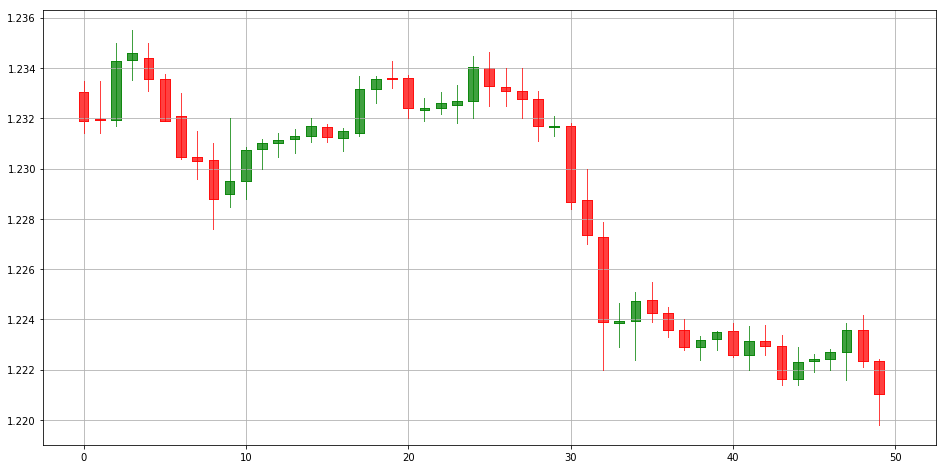

In [8]:
candles(data.iloc[1000:1050, :4])

## Модель "13 свечей"

In [9]:
def fn(n, m):
    arr = []
    cash = 0
    bid = 1000
    for i in range(len(data.close)):
        rng = range(0, n)
        if i in rng:
            continue
        elif list(np.sign(data.change[i-n:i])).count(1) > n-m:
#             if data.close[i] > data.open[i]:
#                 arr.append(1)
#                 cash = cash + bid * (data.close[i]/data.open[i] - 1)
#             else:
#                 arr.append(-1)
#                 cash = cash - bid * (1 - data.close[i]/data.open[i])
            if data.close[i] < data.open[i]:
                arr.append(1)
                cash = cash + bid * (1 - data.close[i]/data.open[i])
            else:
                arr.append(-1)
                cash = cash - bid * (data.close[i]/data.open[i] - 1)                
        else:
            arr.append(0)
    not_in_the_game = arr.count(0)
    profit = arr.count(1)
    loss = arr.count(-1)
    print('{:<17}{:>8}'.format('Not in the game:', not_in_the_game))
    print('{:<17}{:>8}'.format('Profit:', profit))
    print('{:<17}{:>8}'.format('Loss:', loss))
    try:
        print('{:<17}{:>8}'.format('Chance:', round(profit/loss, 2)))
    except:
        pass    
    print('{:<17}{:>8}'.format('Total cash:', round(cash, 4)))

In [10]:
# n = 13
# for m in range(1, n):
#     fn(n, m)
#     print('\n')
fn(13, 7)

Not in the game:     2993
Profit:              1467
Loss:                1450
Chance:              1.01
Total cash:      -17.7457


## Модель перевернутый молот

In [11]:
indices = []
arr = []
cash = 0
bid = 1000
for i in range(len(data.close)):
    rng = range(0, 2)
    if i in rng:
        continue
    if data.close[i-1] < data.open[i-1] and data.change[i-1] < 0 and data.change[i-2] < 0\
             and data.vol[i-1] > data.vol[i-2]:
        upper_shadow = data.high[i-1] - data.open[i-1]
        lower_shadow = data.close[i-1] - data.low[i-1]
        body = data.open[i-1] - data.close[i-1]
        if upper_shadow/body > 2 and body/lower_shadow > 1:
            if data.close[i] > data.open[i]:
                arr.append(1)
                
                cash = cash + bid * (data.close[i]/data.open[i] - 1)
            else:
                arr.append(-1)
                indices.append(i)
                cash = cash - bid * (1 - data.close[i]/data.open[i])                
    else:
        arr.append(0)
not_in_the_game = arr.count(0)
profit = arr.count(1)
loss = arr.count(-1)
print('{:<17}{:>8}'.format('Not in the game:', not_in_the_game))
print('{:<17}{:>8}'.format('Profit:', profit))
print('{:<17}{:>8}'.format('Loss:', loss))
try:
    print('{:<17}{:>8}'.format('Chance:', round(profit/loss, 2)))
except:
    pass    
print('{:<17}{:>8}'.format('Total cash:', round(cash, 4)))

Not in the game:     5210
Profit:                 9
Loss:                   4
Chance:              2.25
Total cash:        1.8951


Date & Time
2018-11-21 18:00:00    114011
2018-11-21 19:00:00    135864
2018-11-21 20:00:00     97558
2018-11-21 21:00:00     82034
2018-11-21 22:00:00     69281
2018-11-21 23:00:00     57802
2018-11-22 00:00:00     52422
2018-11-22 01:00:00     39928
2018-11-22 02:00:00     54633
2018-11-22 03:00:00     44355
2018-11-22 04:00:00     42023
2018-11-22 05:00:00     44174
2018-11-22 06:00:00     44372
2018-11-22 07:00:00     30214
2018-11-22 08:00:00     30956
2018-11-22 09:00:00     26192
2018-11-22 10:00:00     51555
2018-11-22 11:00:00     67538
2018-11-22 12:00:00     76769
2018-11-22 13:00:00     60604
2018-11-22 14:00:00    135771
2018-11-22 15:00:00     93615
2018-11-22 16:00:00     85385
2018-11-22 17:00:00     67986
2018-11-22 18:00:00     63051
2018-11-22 19:00:00     90199
2018-11-22 20:00:00     62369
2018-11-22 21:00:00     45633
2018-11-22 22:00:00     46903
2018-11-22 23:00:00     74094
2018-11-23 00:00:00     53865
2018-11-23 01:00:00     42563
2018-11-23 02:00:00     2317

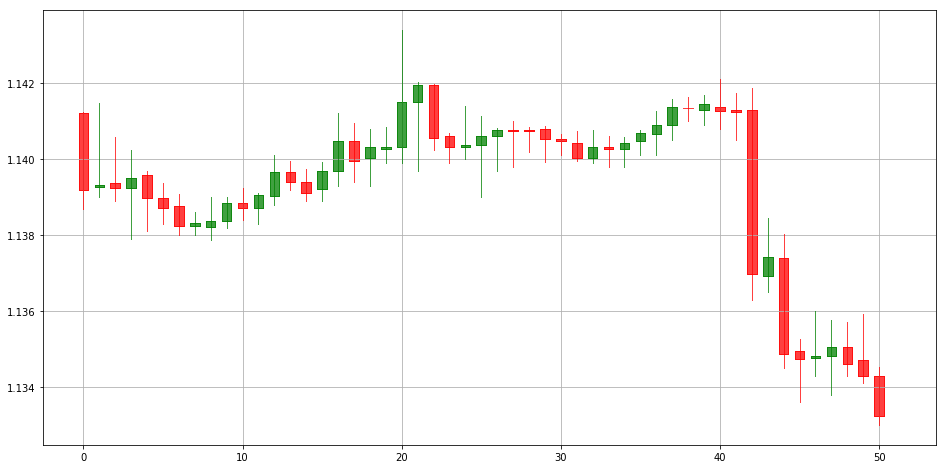

In [12]:
n = indices[3]
candles(data.iloc[n-50:n+1, 0:4])
print(data.vol[n-50:n+1])

## Добавление SMA9, EMA9

In [13]:
per = 9
data['sma'] = data.close.rolling(window=per).mean()
data['ema'] = data.close.ewm(min_periods=per, span=per).mean()

## Покупка на следующий период после пронзания графиком EMA9 снизу

In [14]:
wins = []
fails = []
arr = []
cash = 0
bid = 1000
for i in range(len(data.close)):
    rng = range(0, 2)
    if i in rng:
        continue
    if data.close[i-2] < data.ema[i-2] and data.close[i-1] > data.ema[i-1]: # and data.ema[i-2] < data.ema[i-1]:
        if data.close[i] > data.open[i]:
            arr.append(1)
            wins.append(i)
            cash = cash + bid * (data.close[i]/data.open[i] - 1)
        else:
            arr.append(-1)
            fails.append(i)
            cash = cash - bid * (1 - data.close[i]/data.open[i])                
    else:
        arr.append(0)
not_in_the_game = arr.count(0)
profit = arr.count(1)
loss = arr.count(-1)
print('{:<17}{:>8}'.format('Not in the game:', not_in_the_game))
print('{:<17}{:>8}'.format('Profit:', profit))
print('{:<17}{:>8}'.format('Loss:', loss))
try:
    print('{:<17}{:>8}'.format('Chance:', round(profit/loss, 2)))
except:
    pass    
print('{:<17}{:>8}'.format('Total cash:', round(cash, 4)))

Not in the game:     5369
Profit:               265
Loss:                 287
Chance:              0.92
Total cash:       -5.6903


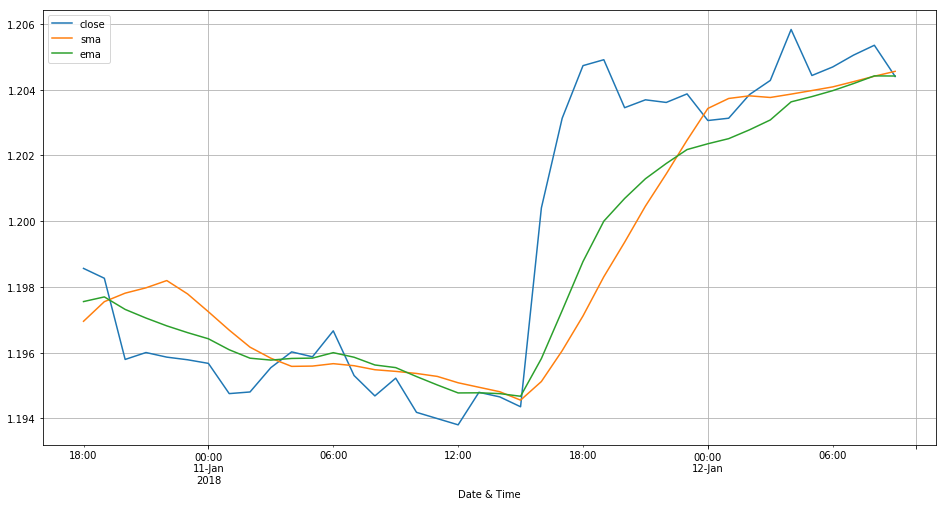

In [15]:
i = 11
data.iloc[fails[i]-20: fails[i]+20, [3, 6, 7]].plot(figsize=(16, 8), grid=True)

## Перебор длин скользящих средних

In [20]:
def smaVSsma(A, B): # A - короткая, B - длинная
    data['smaA'] = data.close.rolling(window=A).mean()
    data['smaB'] = data.close.rolling(window=B).mean()
    
    wins = []
    fails = []
    arr = []
    cash = 0
    bid = 1000
    for i in range(len(data.close)):
        rng = range(0, A if A > B else B)
        if i in rng:
            continue
        if data.smaA[i-2] < data.smaB[i-2] and data.smaA[i-1] > data.smaB[i-1]:
            if data.close[i] > data.open[i]:
                arr.append(1)
                wins.append(i)
                cash = cash + bid * (data.close[i]/data.open[i] - 1)
            else:
                arr.append(-1)
                fails.append(i)
                cash = cash - bid * (1 - data.close[i]/data.open[i])                
        else:
            arr.append(0)
    not_in_the_game = arr.count(0)
    profit = arr.count(1)
    loss = arr.count(-1)
#     print('{:<17}{:>8}'.format('Not in the game:', not_in_the_game))
#     print('{:<17}{:>8}'.format('Profit:', profit))
#     print('{:<17}{:>8}'.format('Loss:', loss))
#     try:
#         print('{:<17}{:>8}'.format('Chance:', round(profit/loss, 2)))
#     except:
#         pass    
#     print('{:<17}{:>8}'.format('Total cash:', round(cash, 4)))
    return [A, B, not_in_the_game, profit, loss, round(cash, 4)]

In [39]:
%%time
res_data = []
for a in range(2, 10):
    for b in range(2, 50):
        res_data.append(smaVSsma(a, b))

CPU times: user 7min 22s, sys: 87.6 ms, total: 7min 22s
Wall time: 7min 22s


In [47]:
%time
df = pd.DataFrame(res_data, columns=['A', 'B', 'NIG', 'Profit', 'Loss', 'Cash'])
df['Chance'] = df['Profit']/(df['Profit'] + df['Loss'])
df.sort_values(by='Chance', ascending=False)

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 10 µs


,A,B,NIG,Profit,Loss,Cash,Chance
353,9,19,5745,94,65,18.1169,0.591195
357,9,23,5764,79,57,19.2609,0.580882
234,6,44,5786,52,41,11.2539,0.559140
232,6,42,5784,54,43,11.3893,0.556701
231,6,41,5784,54,44,9.3175,0.551020
131,4,37,5768,64,54,9.6703,0.542373
61,3,15,5651,139,118,23.6777,0.540856
354,9,20,5751,82,70,9.5299,0.539474
366,9,32,5787,56,48,4.6306,0.538462
356,9,22,5763,74,64,5.8090,0.536232


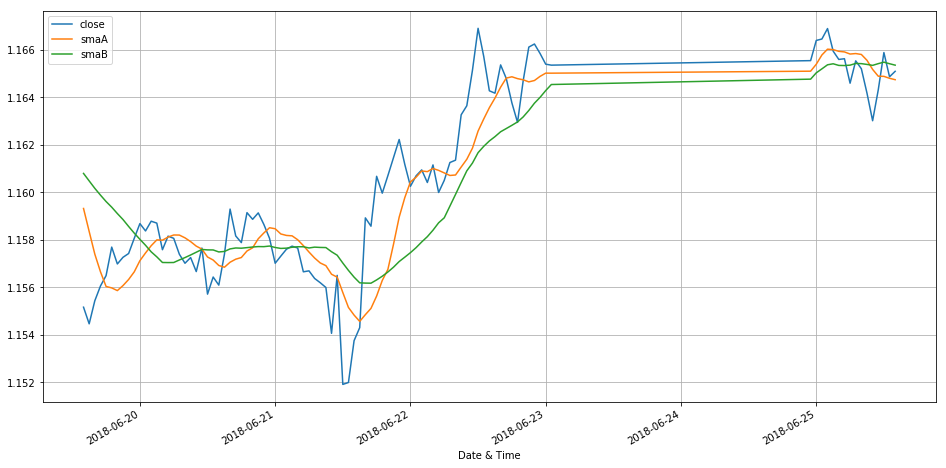

In [48]:
smaVSsma(9, 19)
data.iloc[3000:3100, [3, 8, 9]].plot(figsize=(16, 8), grid=True)

In [87]:
A, B = 9, 19
data['smaA'] = data.close.rolling(window=A).mean() # Short SMA
data['smaB'] = data.close.rolling(window=B).mean() # Long SMA

cash = 0
bid = 1000
opened_deals = []
closed_deals = []

for i in range(len(data.close)):
    rng = range(0, A if A > B else B)
    if i in rng:
        continue
    if data.smaA[i-2] < data.smaB[i-2] and data.smaA[i-1] > data.smaB[i-1]:
        closed_deals.append([data.open[i], data.close[i]])        
#         opened_deals.append([data.open[i], 0])
#     if data.smaA[i-2] > data.smaB[i-2] and data.smaA[i-1] < data.smaB[i-1]:
#         for o in opened_deals:
#             o[1] = data.open[i]
#             closed_deals.append(o)
#         opened_deals = []                       
    else:
        pass

In [91]:
df = pd.DataFrame(closed_deals, columns=['open', 'close'])
df['dif'] = df['close'] - df ['open']
df['sign'] = np.sign(df['dif'])
df['cash'] = (df.close - df.open) * 1000000
print(df.sign.value_counts())
print(df.cash.sum())

 1.0    94
-1.0    64
 0.0     1
Name: sign, dtype: int64
21840.000000000084


In [96]:
df['total'] = df['cash'].cumsum()
df

,open,close,dif,sign,cash,total
0,1.20428,1.20513,0.00085,1.0,850.0,850.0
1,1.20198,1.20141,-0.00057,-1.0,-570.0,280.0
2,1.19452,1.19481,0.00029,1.0,290.0,570.0
3,1.20311,1.20473,0.00162,1.0,1620.0,2190.0
4,1.22594,1.22547,-0.00047,-1.0,-470.0,1720.0
5,1.22398,1.22395,-0.00003,-1.0,-30.0,1690.0
6,1.22561,1.22441,-0.00120,-1.0,-1200.0,490.0
7,1.22534,1.22280,-0.00254,-1.0,-2540.0,-2050.0
8,1.22792,1.22804,0.00012,1.0,120.0,-1930.0
9,1.24554,1.24580,0.00026,1.0,260.0,-1670.0


In [ ]:
'http://export.finam.ru/{0}_{1}_{2}.csv?market=5&em=83&code={0}&apply=0&df={3}&mf={4}&yf={5}&from={6}&dt={7}&mt={8}&yt={9}&to={10}&p=7&f={0}_{1}_{2}&e=.csv&cn={0}&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=3&sep2=1&datf=5&at=1'

In [ ]:
.format(EURUSD, 180101, 181130, 1, 0, 2018, 01.01.2018, 30, 10, 2018, 30.11.2018)

In [2]:
'http://export.finam.ru/{0}_{1}_{2}.csv?market=5&em=83&code={0}&apply=0&df={3}&mf={4}&yf={5}&from={6}&dt={7}&mt={8}&yt={9}&to={10}&p=7&f={0}_{1}_{2}&e=.csv&cn={0}&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=3&sep2=1&datf=5&at=1'.format('EURUSD', '180101', '181130', '1', '0', '2018', '01.01.2018', '30', '10', '2018', '30.11.2018')

'http://export.finam.ru/EURUSD_180101_181130.csv?market=5&em=83&code=EURUSD&apply=0&df=1&mf=0&yf=2018&from=01.01.2018&dt=30&mt=10&yt=2018&to=30.11.2018&p=7&f=EURUSD_180101_181130&e=.csv&cn=EURUSD&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=3&sep2=1&datf=5&at=1'

In [1]:
from datetime import datetime, timedelta

In [14]:
edate = datetime.now()
delta = timedelta(days=7)
sdate = edate - delta

e1 = edate.strftime('%d.%m.%Y')
s1 = sdate.strftime('%d.%m.%Y')

e2 = edate.strftime('%y.%m.%d')
s2 = sdate.strftime('%y.%m.%d')

edate = datetime.timetuple(edate)
sdate = datetime.timetuple(sdate)
ey, em, ed = edate[:3]
sy, sm, sd = sdate[:3]

In [18]:
def geturl(code, s1, e1, sd, sm, sy, s2, ed, em, ey, e2, market, emark):
    sd, sm, sy, ed, em, ey = str(sd), str(sm-1), str(sy), str(ed), str(em-1), str(ey) 
    return ('http://export.finam.ru/{0}_{1}_{2}.csv?market={11}&em={12}&code={0}&apply=0&df={3}&mf={4}&yf={5}&' +\
           'from={6}&dt={7}&mt={8}&yt={9}&to={10}&p=7&f={0}_{1}_{2}&e=.csv&cn={0}&dtf=1&tmf=1&MSOR=1&' +\
           'mstime=on&mstimever=1&sep=3&sep2=1&datf=5&at=1').format(code, s1, e1, sd, sm, sy, s2, ed, em, ey, e2, market, emark)


In [42]:
code = 'USDJPY'
market = '5'
emark = '87'
geturl(code, s1, e1, sd, sm, sy, s2, ed, em, ey, e2, market, emark)

'http://export.finam.ru/USDJPY_01.12.2018_08.12.2018.csv?market=5&em=87&code=USDJPY&apply=0&df=1&mf=11&yf=2018&from=18.12.01&dt=8&mt=11&yt=2018&to=18.12.08&p=7&f=USDJPY_01.12.2018_08.12.2018&e=.csv&cn=USDJPY&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=3&sep2=1&datf=5&at=1'

In [ ]:
http://export.finam.ru/USDSEK_181117_181206.csv?market=5&em=398509&code=USDSEK&apply=0&df=17&mf=10&yf=2018&from=17.11.2018&dt=6&mt=11&yt=2018&to=06.12.2018&p=7&f=USDSEK_181117_181206&e=.csv&cn=USDSEK&dtf=1&tmf=1&MSOR=1&mstime=on&mstimever=1&sep=3&sep2=1&datf=5&at=1

In [26]:
quotes = [
    {'code': 'EURUSD', 'market': '5', 'em': '83'},
    {'code': 'GBPUSD', 'market': '5', 'em': '86'},
    {'code': 'USDCHF', 'market': '5', 'em': '85'},
    {'code': 'USDJPY', 'market': '5', 'em': '87'}
]

In [41]:
class Trade:    
    edate = datetime.now()
    delta = timedelta(days=7)
    sdate = edate - delta

    e1 = edate.strftime('%d.%m.%Y')
    s1 = sdate.strftime('%d.%m.%Y')

    e2 = edate.strftime('%y.%m.%d')
    s2 = sdate.strftime('%y.%m.%d')

    edate = datetime.timetuple(edate)
    sdate = datetime.timetuple(sdate)
    ey, em, ed = edate[:3]
    sy, sm, sd = sdate[:3]
    
    def __init__(self, *args):
        self.quotes = args
        self.data = pd.DataFrame()
    def get_url(self, code, s1, e1, sd, sm, sy, s2, ed, em, ey, e2, market, emark):
        sd, sm, sy, ed, em, ey = str(sd), str(sm-1), str(sy), str(ed), str(em-1), str(ey) 
        return ('http://export.finam.ru/{0}_{1}_{2}.csv?market={11}&em={12}&code={0}&apply=0&df={3}&mf={4}&yf={5}&' +\
               'from={6}&dt={7}&mt={8}&yt={9}&to={10}&p=7&f={0}_{1}_{2}&e=.csv&cn={0}&dtf=1&tmf=1&MSOR=1&' +\
               'mstime=on&mstimever=1&sep=3&sep2=1&datf=5&at=1').format(code, s1, e1, sd, sm, sy, s2, ed, em, ey, e2, market, emark)
    def make_dataset(self, url):
        self.data = pd.read_csv(url, parse_dates={'Date & Time': [0, 1]}, index_col=0, sep=';')
        self.data.rename(lambda x: str.lower(x[1:-1]), axis='columns', inplace=True)
        self.data['sma9'] = data.close.rolling(window=9).mean()
        self.data['sma19'] = data.close.rolling(window=19).mean()
        return self.data
    def analyze(self, data, quote):
        if self.data.sma9[-3] < self.data.sma19[-3] and self.data.sma9[-2] > self.data.sma19[-2]:
            print('Buy {}'.format(self.quote['code']))
            self.data.iloc[:, [3, 4, 4]].plot(figsize=(16, 8), grid=True)
    def main(self):
        for q in self.quotes:
            url = self.get_url(q['code'], s1, e1, sd, sm, sy, s2, ed, em, ey, e2, q['market'], q['em'])
            self.analyze(make_dataset(url), q)
    

AttributeError: module 'datetime' has no attribute 'now'

In [32]:
a = list(range(10))

In [33]:
a[-2]

8

In [35]:
asdf = pd.DataFrame()

In [36]:
asdf

""


In [37]:
asdf.describe

<bound method NDFrame.describe of Empty DataFrame
Columns: []
Index: []>